<a href="https://colab.research.google.com/github/Mohit352-bit/Machine-Learning/blob/main/Neural%20Network/CNN_FMNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#importing inbuilt dataset in tensorflow
# there are total 10 type of clothing in this data and there image are reduced to size 28x28 and is in grayscale so less computing is required 
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
#as dataset is sotred in the form of arrays so we need to first extract them in different variables

(train_image , train_label) , (test_image , test_label) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


9


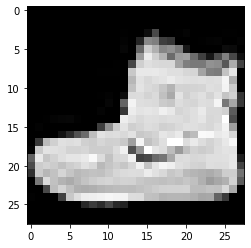

In [ ]:
#visualising the dataset of fmnist on graph

#print(train_image[0])

# each clothing is labled from 0 to 9 and this sneaker is marked 9 this is what the below code will display
print(train_label[0])

plt.imshow(train_image[0] , cmap='gray')

In [ ]:
# each value in train_image is in range of 0 to 255 as it depicts RGB so to normalise (making it to standard scale between 0 and 1) it we need to divide it by 255

train_image = train_image / 255
test_image = test_image / 255

In [ ]:
train_image.shape
test_image.shape

(10000, 28, 28)

## Building the Classification model



 **Sequential**: That defines a sequence of layers in the neural network.

**Flatten**:  our images were a 28x28 pixel matrix when we printed them out.Flatten just takes that 28x28 square matrix and turns it into a 1-dimensional array and the send the values inside the array as input to the first layer of neuron

**Dense**: Adds a layer of neurons

**Activation**
Each layer of neurons need an activation function to tell them what to do. There are a lot of options, but just use these for now:

**ReLU** effectively means:

if x > 0: 
  return x

else: 
  return 0
  
In other words, it only passes values 0 or greater to the next layer in the network.

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(512 , activation=tf.nn.relu),
    tf.keras.layers.Dense(10 , activation= tf.nn.softmax)

])

First we run the whole on 128 nodes and we get accuracy 88.829 the we use 512 nodes and we get 89.891 from this we can get that there is no large increase
 in accuracy.We use larger number of nodes to when the data is too complex(i.e. if we use coloured images instead of grey scaled) and the data we are handling is not that much complex so we didn't get much importvement in the accuracy bold text

In [ ]:
# .compile is the function where the model checks th error and analyse for better result
# every time the accuracy of model is improved 


model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_image, train_label, epochs=100)

Epoch 1/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.4760 - accuracy: 0.8308
Epoch 2/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3584 - accuracy: 0.8704
Epoch 3/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3233 - accuracy: 0.8814
Epoch 4/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2958 - accuracy: 0.8910
Epoch 5/100
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2782 - accuracy: 0.8964
Epoch 6/100
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2641 - accuracy: 0.9012
Epoch 7/100
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2506 - accuracy: 0.9056
Epoch 8/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2405 - accuracy: 0.9087
Epoch 9/100
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2316 - accuracy: 0.9119
Epoch 10/100
1875/1875 [==============================] - 9s 5ms/step 

In [ ]:
# to evaluate the accuracy of the model
model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.8601 - accuracy: 0.8916


[0.8600794076919556, 0.8916000127792358]

##Epoch
if we want to stop the epoch at a particular accuracy or loss value so that we donot have to run the whole epoch, we can use ***Callbacks*** .

***Log*** - it stores every data like accuracy value , loss value , time etc of the epoch and '.get' can be used to get particular data we want


In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self , epoch, log={}):
    if(log.get('loss') < 0.26 ):
      print('nLoss is lower than 0.26 so cancelling training!')
      self.model.stop_training = True
  
#Initantiating callback class

callbackit = myCallback()


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape =(28,28)),
    tf.keras.layers.Dense(128 , activation=tf.nn.relu),
    tf.keras.layers.Dense(10 , activation= tf.nn.softmax)

])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_image, train_label, epochs=40 , callbacks= [callbackit])

Epoch 1/40
1875/1875 [==============================] - 7s 2ms/step - loss: 0.5000 - accuracy: 0.8238
Epoch 2/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3763 - accuracy: 0.8641
Epoch 3/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3400 - accuracy: 0.8767
Epoch 4/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3139 - accuracy: 0.8853
Epoch 5/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2959 - accuracy: 0.8894
Epoch 6/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2804 - accuracy: 0.8962
Epoch 7/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2676 - accuracy: 0.9001
Epoch 8/40
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2586 - accuracy: 0.9045


In [ ]:
model.evaluate(test_image ,test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3436 - accuracy: 0.8808


[0.34357649087905884, 0.8808000087738037]

# Using CNN to improve accuracy



Reshaping the data


In [ ]:
train_image.shape

(60000, 28, 28)

In [ ]:
#converting the data into shape (60000,28,28,1)
train_image = train_image.reshape(60000,28,28,1)
test_image = test_image.reshape(10000, 28, 28,1)

In [ ]:
from tensorflow.python.ops.metrics_impl import accuracy
from tensorflow.python import metrics
cnn_model = tf.keras.models.Sequential([
    # here 64 is the number of filters we are using , (3,3) is the pixel size of the filters , we are using relu to get all +ve linear output ,and our image is in the shape 28 ,28 and 1 for it is in grey scale
    tf.keras.layers.Conv2D(64 ,(3,3) , activation='relu' ,input_shape=(28,28,1)),
    #here we are maxpooling the convolved layer to (2,2) pixel (i.e. refer to onenotes)
    tf.keras.layers.MaxPool2D(2,2),
    #again applied convolution and pooling for further more reducing the pixel size to get better accuracy while training
    tf.keras.layers.Conv2D(64, (3,3) , activation ="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
    
])
cnn_model.compile(optimizer = 'adam' , loss ="sparse_categorical_crossentropy" , metrics=['accuracy'])
cnn_model.fit(train_image, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.4457 - accuracy: 0.8377
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2981 - accuracy: 0.8908
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2510 - accuracy: 0.9064
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2190 - accuracy: 0.9177
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1913 - accuracy: 0.9290
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1686 - accuracy: 0.9372
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1486 - accuracy: 0.9446
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1304 - accuracy: 0.9510
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1148 - accuracy: 0.9572
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.098

In [ ]:
cnn_model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3022 - accuracy: 0.9089


[0.3022109270095825, 0.9089000225067139]

In [ ]:
#it shows all the steps that happened on our data during convolution and pooling
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [ ]:
from tensorflow.python.ops.metrics_impl import accuracy
from tensorflow.python import metrics
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64 ,(3,3) , activation='relu' ,input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    # tf.keras.layers.Conv2D(64, (3,3) , activation ="relu"),
    # tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
    
])
cnn_model.compile(optimizer = 'adam' , loss ="sparse_categorical_crossentropy" , metrics=['accuracy'])
cnn_model.fit(train_image, train_label, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3799 - accuracy: 0.8657
Epoch 2/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2551 - accuracy: 0.9060
Epoch 3/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2083 - accuracy: 0.9232
Epoch 4/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1747 - accuracy: 0.9361
Epoch 5/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1464 - accuracy: 0.9455
Epoch 6/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1218 - accuracy: 0.9547
Epoch 7/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1018 - accuracy: 0.9625
Epoch 8/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0828 - accuracy: 0.9696
Epoch 9/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0693 - accuracy: 0.9745
Epoch 10/20
1875/1875 [==============================] - 5s 3ms/step - loss: 0.057

KeyboardInterrupt: ignored

In [ ]:
cnn_model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 2ms/step - loss: 0.3268 - accuracy: 0.9173


[0.3268163502216339, 0.9172999858856201]

In [ ]:
cnn_model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 10816)             0         
                                                                 
 dense_28 (Dense)            (None, 128)               1384576   
                                                                 
 dense_29 (Dense)            (None, 10)                1290      
                                                                 
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
___________________________________________

In [ ]:
from tensorflow.python.ops.metrics_impl import accuracy
from tensorflow.python import metrics
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64 ,(3,3) , activation='relu' ,input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3) , activation ="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3) , activation ="relu"),
    tf.keras.layers.MaxPool2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
    
])
cnn_model.compile(optimizer = 'adam' , loss ="sparse_categorical_crossentropy" , metrics=['accuracy'])
cnn_model.fit(train_image, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5728 - accuracy: 0.7902
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3833 - accuracy: 0.8592
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3271 - accuracy: 0.8776
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2935 - accuracy: 0.8905
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2685 - accuracy: 0.8999
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2463 - accuracy: 0.9057
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2291 - accuracy: 0.9142
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2128 - accuracy: 0.9198
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1997 - accuracy: 0.9242
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.187

In [ ]:
cnn_model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3098 - accuracy: 0.8965


[0.309829443693161, 0.8964999914169312]

In [ ]:
cnn_model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 1, 1, 64)       

In [ ]:
from tensorflow.python.ops.metrics_impl import accuracy
from tensorflow.python import metrics
cnn_model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(128 ,(3,3) , activation='relu' ,input_shape=(28,28,1)),
    tf.keras.layers.MaxPool2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128 , activation='relu'),
    tf.keras.layers.Dense(10, activation="softmax")
    
])
cnn_model.compile(optimizer = 'adam' , loss ="sparse_categorical_crossentropy" , metrics=['accuracy'])
cnn_model.fit(train_image, train_label, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3638 - accuracy: 0.8701
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2451 - accuracy: 0.9102
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1964 - accuracy: 0.9280
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1595 - accuracy: 0.9406
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1311 - accuracy: 0.9514
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1066 - accuracy: 0.9600
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0849 - accuracy: 0.9685
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0696 - accuracy: 0.9751
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0567 - accuracy: 0.9797
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.046

In [ ]:
cnn_model.evaluate(test_image, test_label)

313/313 [==============================] - 1s 3ms/step - loss: 0.3610 - accuracy: 0.9131


[0.3610442280769348, 0.913100004196167]